<a href="https://colab.research.google.com/github/elifftosunn/ML-vs-DL-EDA-Spaceship-Titanic-/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# **Data Understanding** 

In [4]:
trainDf = pd.read_csv("drive/MyDrive/Colab Notebooks/datas/titanic/train.csv")
testDf = pd.read_csv("drive/MyDrive/Colab Notebooks/datas/titanic/test.csv")
trainDf.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
testDf.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [36]:
trainDf.shape, testDf.shape

((8693, 14), (4277, 13))

In [37]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
trainDf.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


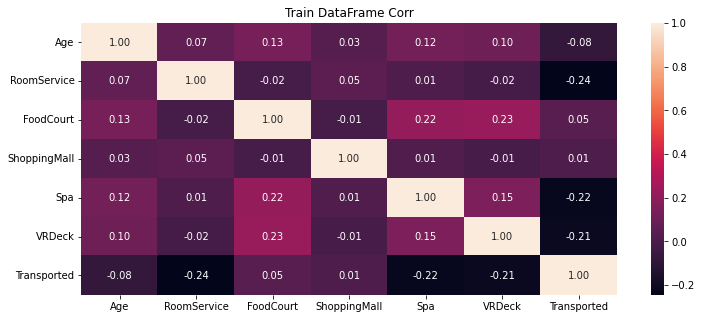

In [9]:
plt.figure(figsize=(12,5))
sns.heatmap(trainDf.corr(), annot = True, fmt = ".2f")
plt.title("Train DataFrame Corr")
plt.show()

In [ ]:
trainDf.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [38]:
df = pd.concat([trainDf, testDf])
df.drop(['PassengerId', 'Cabin', 'Name'], axis = 1, inplace = True)
df.Transported = df.Transported.astype('str')
df.shape

(12970, 11)

In [39]:
def ColumnCategorize(df,limit):
  cat_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() < limit]
  num_but_cat = [col for col in df.columns if df[col].dtypes != "O" and df[col].nunique() < limit]
  cat_but_num = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() >= limit]
  num_cols = [col for col in df.columns if df[col].dtypes != "O" and df[col].nunique() >= limit]
  cat_cols = cat_cols + num_but_cat
  return cat_cols, cat_but_num, num_cols
cat_cols, cat_but_num, num_cols = ColumnCategorize(df, 20)
print("Cat Columns: {}\nCat but Numeric Columns: {}\nNumeric Columns: {}".format(cat_cols, cat_but_num, num_cols))

Cat Columns: ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']
Cat but Numeric Columns: []
Numeric Columns: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [40]:
for col in df.columns:
  print(col, " : " ,df[col].nunique())

HomePlanet  :  3
CryoSleep  :  2
Destination  :  3
Age  :  80
VIP  :  2
RoomService  :  1578
FoodCourt  :  1953
ShoppingMall  :  1367
Spa  :  1679
VRDeck  :  1642
Transported  :  3


# **Data Visualization** 


         Count      Ratio
Earth    6865  52.929838
Europa   3133  24.155744
Mars     2684  20.693909 



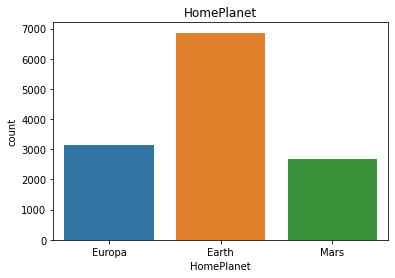


        Count      Ratio
False   8079  62.289900
True    4581  35.319969 



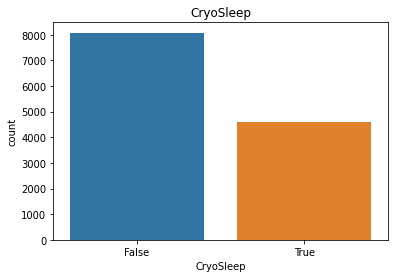


                Count      Ratio
TRAPPIST-1e     8871  68.396299
55 Cancri e     2641  20.362375
PSO J318.5-22   1184   9.128759 



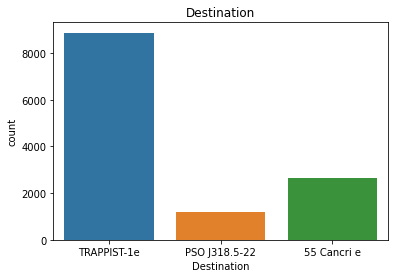


        Count      Ratio
False  12401  95.612953
True     273   2.104857 



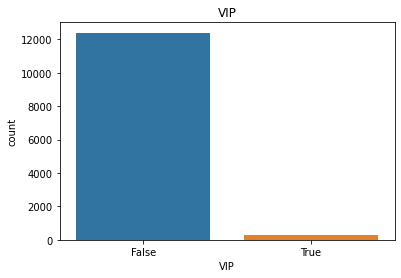


        Count      Ratio
True    4378  33.754819
False   4315  33.269082
nan     4277  32.976099 



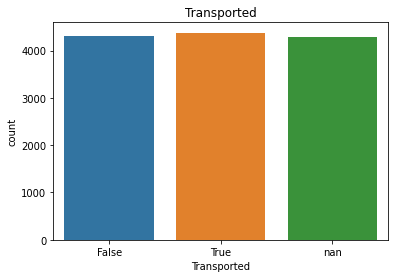

In [17]:
def cat_summary(df,col, plot = False):
  print("\n",pd.DataFrame({"Count":df[col].value_counts(),
                      "Ratio":100*df[col].value_counts()/len(df)}),"\n")
  if plot:
    sns.countplot(df[col])
    plt.title(col)
    plt.show()
for col in cat_cols:
  cat_summary(df, col, plot = True)

In [41]:
num_cols

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

<Figure size 432x288 with 0 Axes>

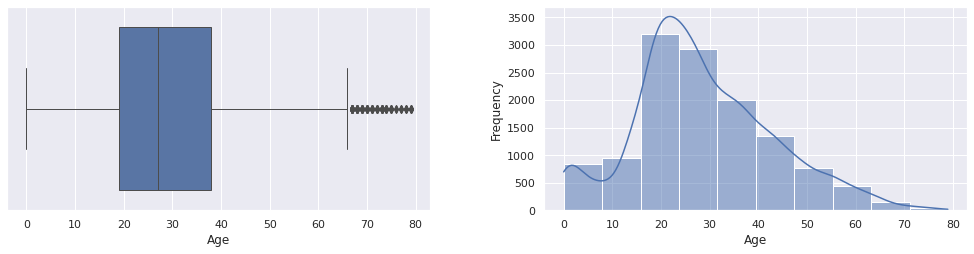

<Figure size 1080x360 with 0 Axes>

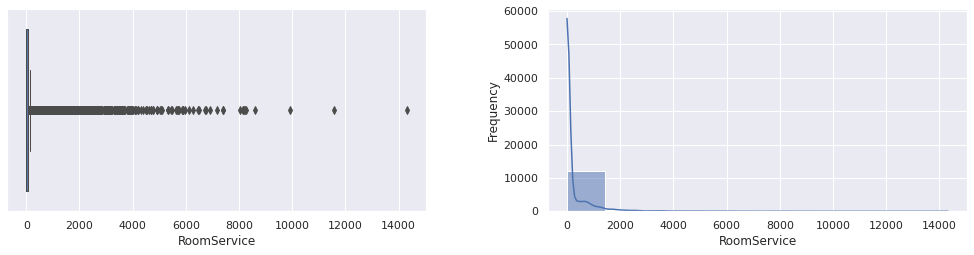

<Figure size 1080x360 with 0 Axes>

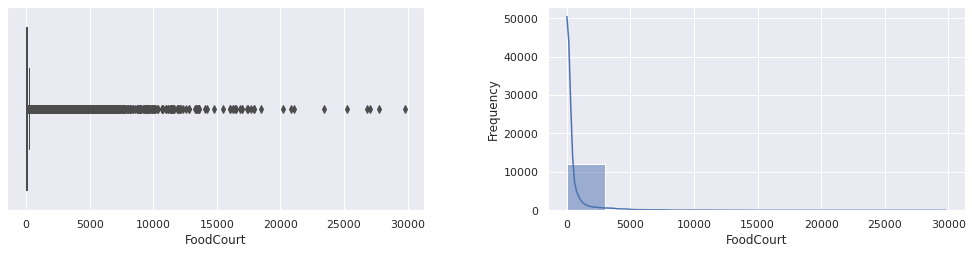

<Figure size 1080x360 with 0 Axes>

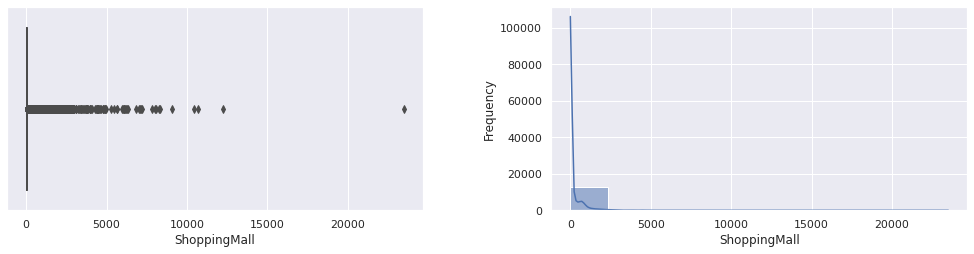

<Figure size 1080x360 with 0 Axes>

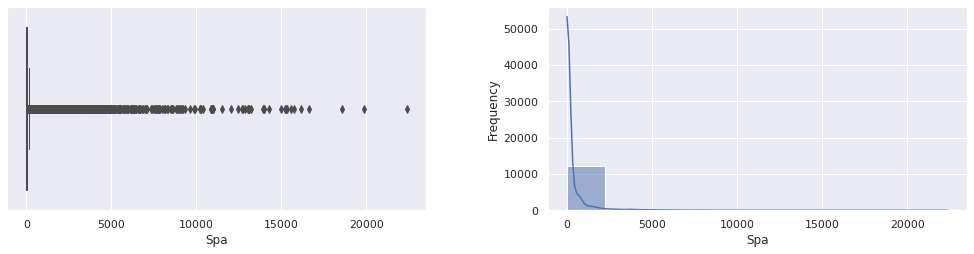

<Figure size 1080x360 with 0 Axes>

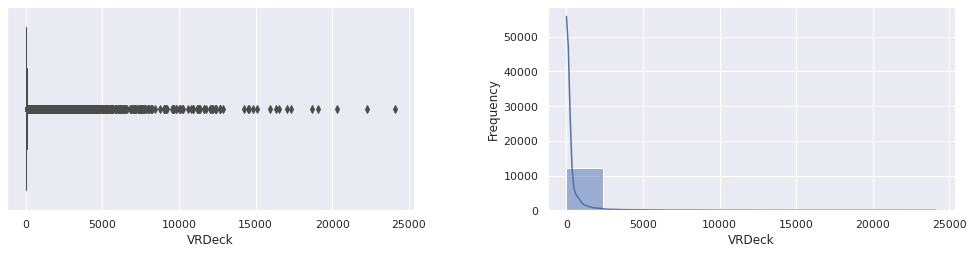

In [21]:
for col in num_cols:
    plt.figure()
    sns.set(rc={"figure.figsize":(15, 5)})
    fig, axes = plt.subplots(nrows = 1, ncols = 2, sharex=True)
    plt.gca().set(xlabel= col,ylabel='Frequency')
    sns.boxplot(df[col], ax=axes[0] , linewidth= 1.0)
    sns.histplot(df[col], ax=axes[1] , bins = 10,kde=True)
    plt.tight_layout(pad = 5)

# **Data PreProcessing**

In [42]:
df[num_cols].isna().sum()

Age             270
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
dtype: int64

In [62]:
from sklearn.impute import SimpleImputer
def NumericColFillna(df,num_col):
  imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
  df[num_col] = imputer.fit_transform(df[num_col].values.reshape(-1,1))
for col in num_cols:
  NumericColFillna(df, col)

In [71]:
df[num_cols].isna().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [72]:
df[cat_cols].isna().sum()

HomePlanet     288
CryoSleep      310
Destination    274
VIP            296
Transported      0
dtype: int64

In [75]:
from sklearn_pandas import CategoricalImputer
def CategoricColFillna(df,cat_cols):
  catImputer = CategoricalImputer(missing_values=np.nan, strategy="most_frequent")
  dataCat = np.array(df[cat_cols], dtype=object)
  df[cat_cols] = pd.DataFrame(catImputer.fit_transform(dataCat), columns = cat_cols)
  return df[cat_cols]
df[cat_cols] = CategoricColFillna(df, cat_cols)
df[cat_cols]

,HomePlanet,CryoSleep,Destination,VIP,Transported
0,Europa,False,TRAPPIST-1e,False,False
1,Earth,False,TRAPPIST-1e,False,True
2,Europa,False,TRAPPIST-1e,True,False
3,Europa,False,TRAPPIST-1e,False,False
4,Earth,False,TRAPPIST-1e,False,True
...,...,...,...,...,...
4272,Earth,False,TRAPPIST-1e,False,False
4273,Earth,False,TRAPPIST-1e,False,True
4274,Mars,False,TRAPPIST-1e,False,True
4275,Europa,False,PSO J318.5-22,True,False


In [76]:
df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

# **Outlier Detection** 

In [77]:
def outlierThreshold(df, col, q1, q3):
  Q1 = df[col].quantile(q1)
  Q3 = df[col].quantile(q3)
  iqr = Q3 - Q1
  lowerLimit = Q1 - iqr * 1.5
  upperLimit = Q3 + iqr * 1.5
  return lowerLimit, upperLimit
def outlierIsThereAny(df,col, q1, q3):
  lowerLimit, upperLimit = outlierThreshold(df, col, q1, q3)
  outlierDf = df.loc[(df[col] < lowerLimit) | (df[col] > upperLimit)]
  if outlierDf.any(axis = None):
    return len(outlierDf)
  else: 
    return False 
for col in num_cols:
  print(col, "outlier value: ",outlierIsThereAny(df, col, q1 = 0.25, q3 = 0.75))

Age outlier value:  237
RoomService outlier value:  2746
FoodCourt outlier value:  2710
ShoppingMall outlier value:  2756
Spa outlier value:  2688
VRDeck outlier value:  2747


In [79]:
dfCopy = df.copy()
dfCopy.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [80]:
dfCopy.shape

(12970, 11)

In [81]:
for col in num_cols:
   lowerLimit, upperLimit = outlierThreshold(dfCopy, col, q1 = 0.15, q3 = 0.85)
   dfCopy = dfCopy.loc[(dfCopy[col] > lowerLimit) & (dfCopy[col] < upperLimit)]
   print(dfCopy.shape)

(12970, 11)
(12160, 11)
(11229, 11)
(10285, 11)
(9497, 11)
(8854, 11)


# **Anomaly Detection**

In [83]:
from sklearn.ensemble import IsolationForest
def isolationForest(df):
  clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                          max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
  clf.fit(dfCopy[num_cols])
  pred = clf.predict(dfCopy[num_cols])
  dfCopy['anomaly']=pred
  outliers=dfCopy.loc[dfCopy['anomaly']==-1]
  #outliers.index = range(len(outliers))
  #outlier_index=list(outliers.index)
  #Find the number of anomalies and normal points here points classified -1 are anomalous
  print(dfCopy['anomaly'].value_counts())
  return outliers
outliers = isolationForest(dfCopy)
outliers.index

 1    7791
-1    1063
Name: anomaly, dtype: int64


Int64Index([   4,   20,   32,   38,   60,   66,   80,   88,   91,  110,
            ...
            4110, 4122, 4123, 4126, 4166, 4189, 4204, 4213, 4214, 4236],
           dtype='int64', length=1063)

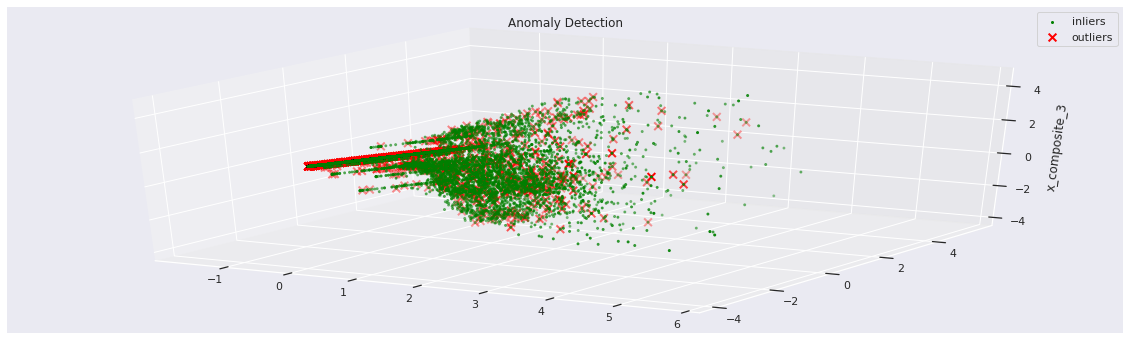

In [85]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
def AnomalyDetection3DVisualization(df,outlier_index):
  pca = PCA(n_components=3)  # Reduce to k=3 dimensions
  scaler = StandardScaler()
  #normalize the metrics
  X = scaler.fit_transform(df[num_cols])
  X_reduce = pca.fit_transform(X)
  fig = plt.figure(figsize=(20,6))
  ax = fig.add_subplot(111, projection='3d')
  ax.set_zlabel("x_composite_3")
  # Plot the compressed data points
  ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
  # Plot x's for the ground truth outliers
  ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
            lw=2, s=60, marker="x", c="red", label="outliers")
  ax.legend()
  plt.title("Anomaly Detection")
  plt.show()
AnomalyDetection3DVisualization(dfCopy, range(len(outliers)))

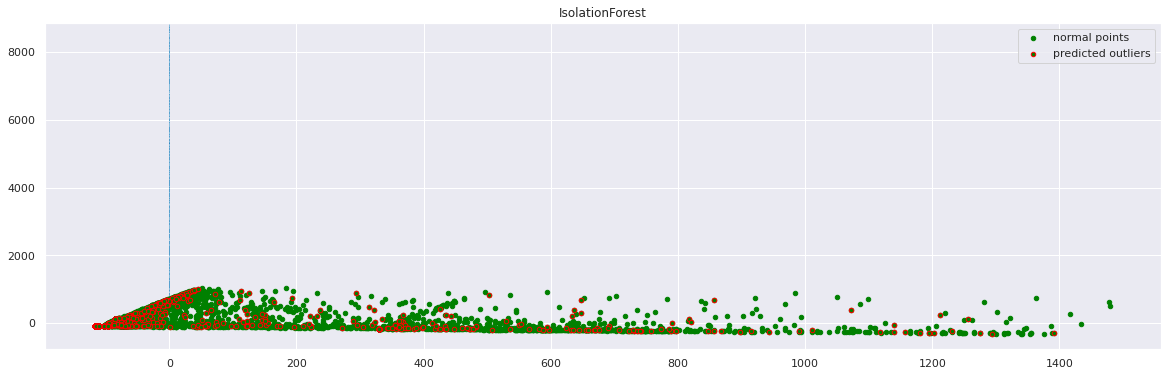

In [86]:
def AnomalyDetection2DVisualization(df, outlier_index):
  pca = PCA(2)
  pca.fit(df[num_cols])
  result=pd.DataFrame(pca.transform(df[num_cols]))
  result_array = np.array(result)
  plt.figure(figsize=(20,6))
  plt.title("IsolationForest")
  plt.contourf(result_array, cmap=plt.cm.Blues_r)
  b1 = plt.scatter(result[0], result[1], c='green',
                  s=20,label="normal points")
  b1 = plt.scatter(result.loc[outlier_index,0],result.loc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
  plt.legend(loc="upper right")
  plt.show()
AnomalyDetection2DVisualization(dfCopy, range(len(outliers)))

In [87]:
notAnomalyDfCopy = dfCopy.loc[dfCopy.anomaly == 1]
dfCopy = notAnomalyDfCopy
dfCopy.shape

(7791, 12)

In [88]:
for col in dfCopy.columns:
  print(col, " : " ,dfCopy[col].nunique())

HomePlanet  :  4
CryoSleep  :  2
Destination  :  4
Age  :  79
VIP  :  2
RoomService  :  703
FoodCourt  :  669
ShoppingMall  :  433
Spa  :  490
VRDeck  :  417
Transported  :  2
anomaly  :  1


# **One Hot Encoding**

In [90]:
def convertCategoricToNumeric(df,cat_cols):
  df = pd.get_dummies(data = df, columns = cat_cols, drop_first = True)
  return df
dfCopy = convertCategoricToNumeric(dfCopy, cat_cols) 
dfCopy.shape 

(7791, 16)

In [91]:
dfCopy.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,anomaly,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Transported_True
0,39.0,0.0,0.0,0.0,0.0,0.000000,1,0,1,0,0,0,0,1,0,0
1,24.0,109.0,9.0,25.0,549.0,44.000000,1,1,0,0,0,0,0,1,0,1
5,44.0,0.0,483.0,0.0,291.0,0.000000,1,1,0,0,0,0,1,0,0,1
7,28.0,0.0,0.0,0.0,0.0,306.789482,1,1,0,0,1,0,0,1,0,1
8,35.0,0.0,785.0,17.0,216.0,0.000000,1,1,0,0,0,0,0,1,0,1


# **Model Selection**

In [92]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
def trainTestSplit(df,target,test_size, random_state):
  X = df.drop(target, axis = 1).values
  y = df[target].values.reshape(-1,1)
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = test_size, random_state = random_state)
  scaler = MinMaxScaler() 
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = trainTestSplit(dfCopy, "Transported_True", 0.3, 42)


LogisticRegression:
MSE: 0.2660393498716852
MAE: 35.57399486740804
Accuracy Score: 0.7339606501283148
CV Mean: 0.7359307053802466
F1 Score: 0.7760979121670267



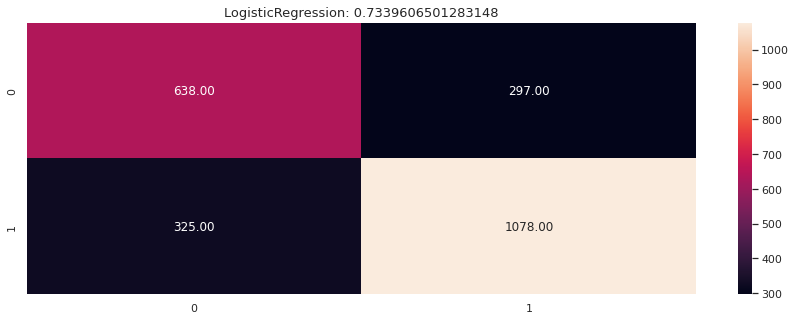

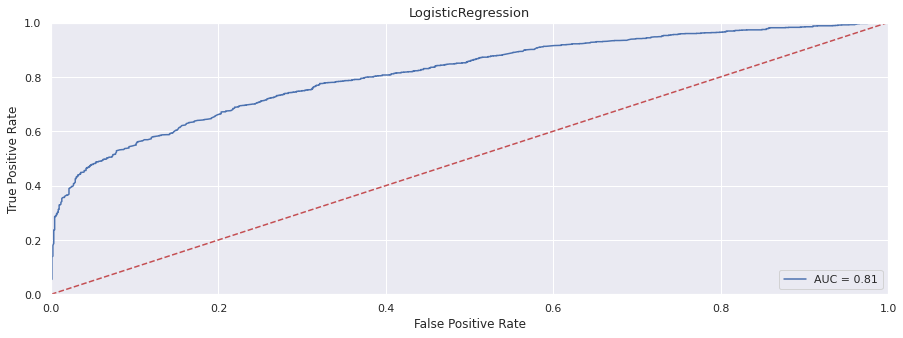


GaussianNB:
MSE: 0.29597946963216426
MAE: 37.885372112917025
Accuracy Score: 0.7040205303678357
CV Mean: 0.7073253352152435
F1 Score: 0.7533856022808268



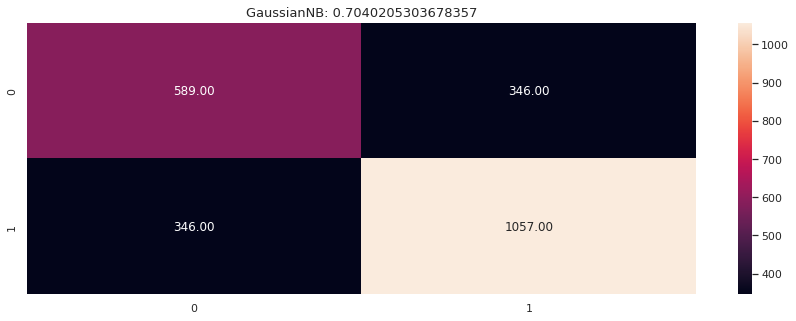

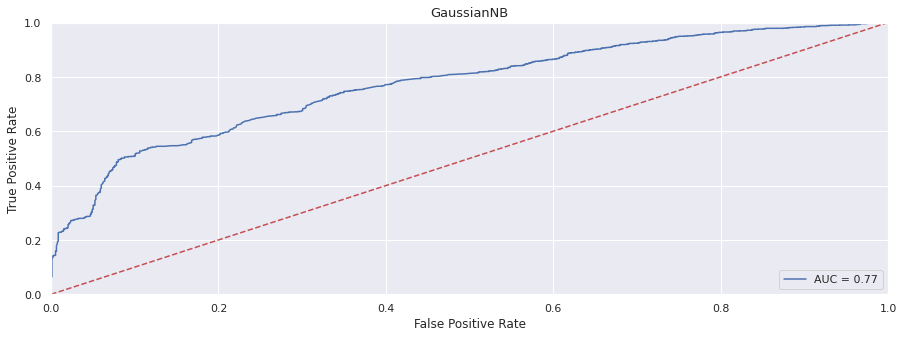


DecisionTreeClassifier:
MSE: 0.306672369546621
MAE: 40.0688622754491
Accuracy Score: 0.693327630453379
CV Mean: 0.6900806532916626
F1 Score: 0.7431028305266929



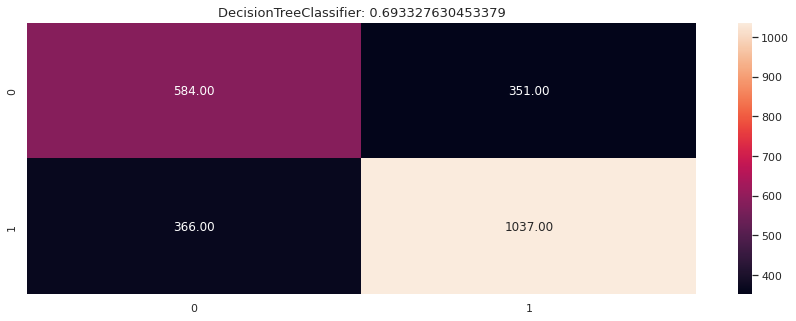

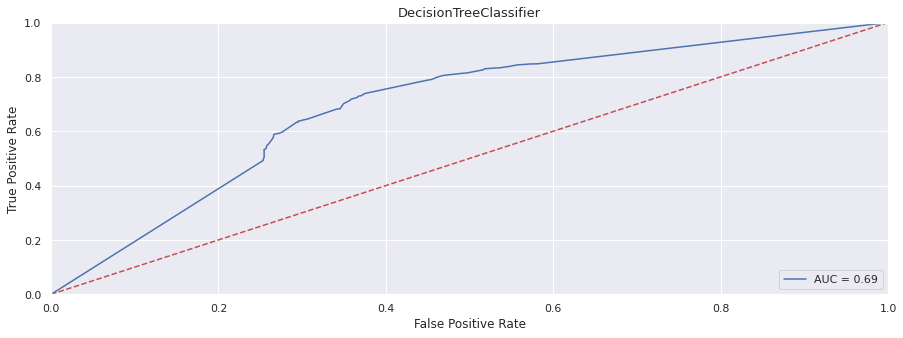


MLPClassifier:
MSE: 0.2780153977758768
MAE: 35.36869118905047
Accuracy Score: 0.7219846022241232
CV Mean: 0.7161279698894378
F1 Score: 0.7686832740213524



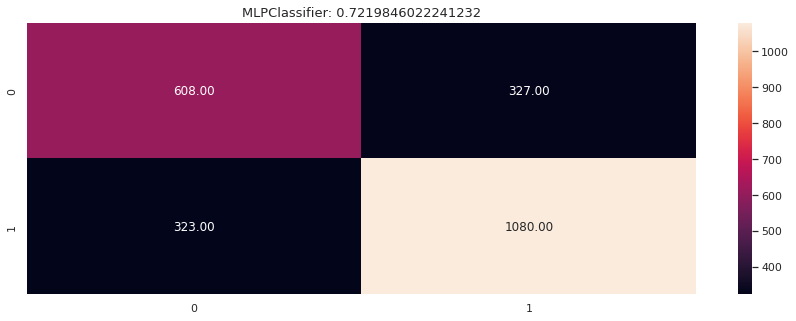

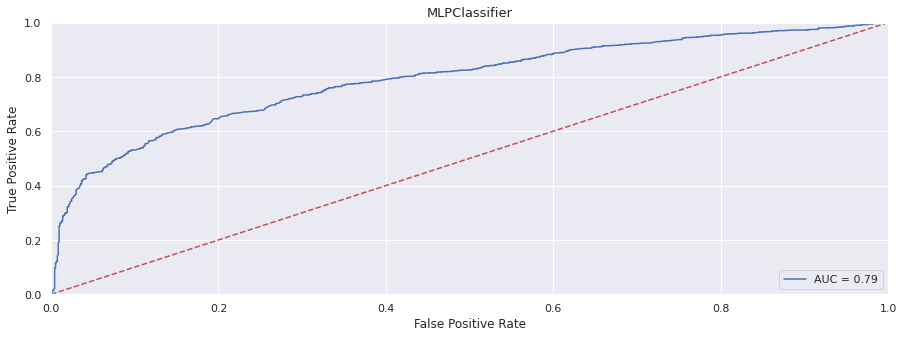


KNeighborsClassifier:
MSE: 0.31223267750213857
MAE: 37.57570573139436
Accuracy Score: 0.6877673224978614
CV Mean: 0.6843935880633129
F1 Score: 0.743859649122807



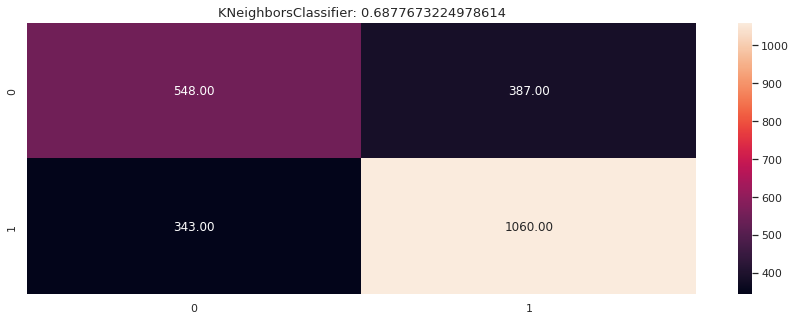

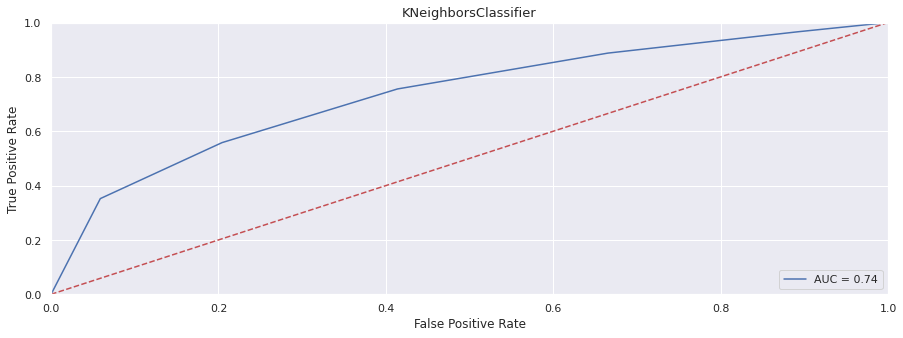


GradientBoostingClassifier:
MSE: 0.2630453378956373
MAE: 32.42044482463644
Accuracy Score: 0.7369546621043627
CV Mean: 0.7359260006048998
F1 Score: 0.782608695652174



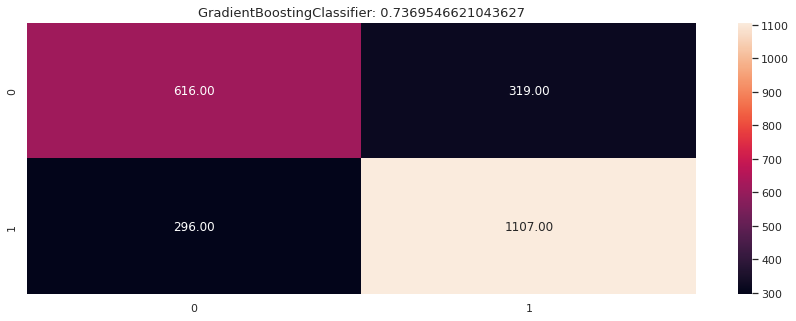

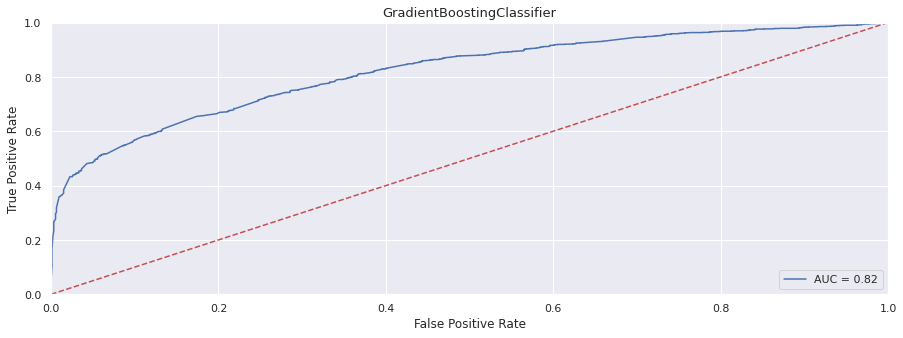


LGBMClassifier:
MSE: 0.26390076988879385
MAE: 34.92001710863986
Accuracy Score: 0.7360992301112061
CV Mean: 0.7293255368484727
F1 Score: 0.7784560143626571



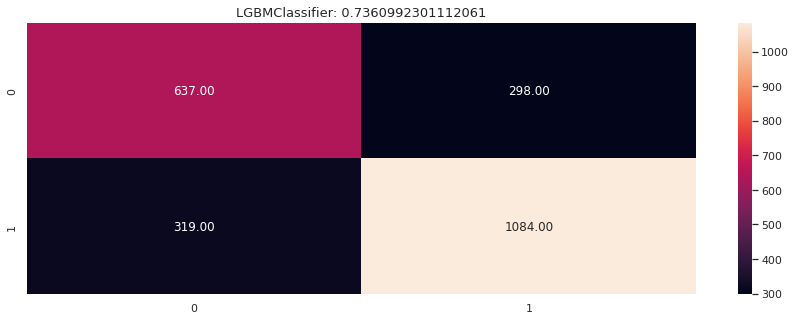

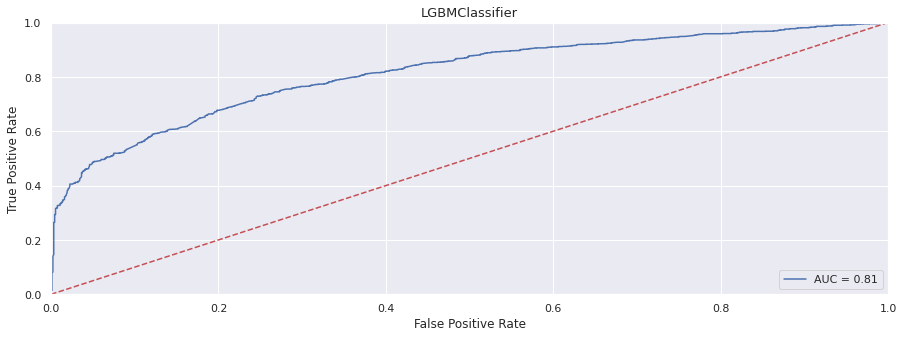

{'LogisticRegression': array([1, 0, 1, ..., 1, 0, 1], dtype=uint8),
 'GaussianNB': array([1, 0, 1, ..., 1, 0, 0], dtype=uint8),
 'DecisionTreeClassifier': array([1, 0, 0, ..., 0, 0, 0], dtype=uint8),
 'MLPClassifier': array([1, 1, 1, ..., 1, 0, 1], dtype=uint8),
 'KNeighborsClassifier': array([1, 0, 0, ..., 1, 1, 1], dtype=uint8),
 'GradientBoostingClassifier': array([1, 0, 1, ..., 1, 1, 1], dtype=uint8),
 'LGBMClassifier': array([1, 0, 1, ..., 1, 0, 0], dtype=uint8)}

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, accuracy_score, confusion_matrix
import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error

def trainTest(df,target):
  X = df.drop(target, axis = 1).values
  y = df[target].values.reshape(-1,1)
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)
  return X_train, X_test, y_train, y_test
def models():
  classifier = [
      ("LogisticRegression",LogisticRegression()),
      ("GaussianNB",GaussianNB()),
      ("DecisionTreeClassifier",DecisionTreeClassifier()),
      ("MLPClassifier",MLPClassifier()),
      ("KNeighborsClassifier",KNeighborsClassifier()),
      ("GradientBoostingClassifier",GradientBoostingClassifier()),
      ("LGBMClassifier",LGBMClassifier())
  ]
  return classifier
def modelRun(df, target):
    predictDict = {}
    predictList = []
    X_train, X_test, y_train, y_test = trainTest(df,target)
    classifier = models()
    for name,model in classifier:
       cls = model.fit(X_train, y_train)
       y_pred = cls.predict(X_test)
       predictDict[name] = y_pred
       predictList.append(y_pred)
       cv_results = cross_val_score(cls,X_train, y_train, cv = 10, scoring = "accuracy")
       cv_mean = cv_results.mean()
       acc_score = accuracy_score(y_test, y_pred)
       mse = mean_squared_error(y_test, y_pred)
       mae = mean_absolute_error(y_test,y_pred)
       f1_Score = f1_score(y_test, y_pred) 
       print("\n{}:\nMSE: {}\nMAE: {}\nAccuracy Score: {}\nCV Mean: {}\nF1 Score: {}\n".format(name,mse,
                                                                                      mae,
                                                                                      acc_score,
                                                                                      cv_mean,
                                                                                      f1_Score))
       sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = ".2f") 
       plt.title("{}: {}".format(name,accuracy_score(y_test,y_pred)), fontsize = 13)
       plt.show()
       print("\n")
       probs = cls.predict_proba(X_test)
       preds = probs[:,1]
       fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
       roc_auc = metrics.auc(fpr, tpr)

       plt.title('Receiver Operating Characteristic')
       plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
       plt.legend(loc = 'lower right')
       plt.plot([0, 1], [0, 1],'r--')
       plt.xlim([0, 1])
       plt.ylim([0, 1])
       plt.ylabel('True Positive Rate')
       plt.xlabel('False Positive Rate')
       plt.title(name, fontsize = 13)
       plt.show()
    return predictDict, predictList

predictDict, predictList = modelRun(dfCopy,"Transported_True")
predictDict

# **Model Selection and GridSearchCV**

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer
#creating Scoring parameter: 
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}

# A sample parameter

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.075, 0.1, 0.2],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"]  
}
#passing the scoring function in the GridSearchCV
clf = GridSearchCV(GradientBoostingClassifier(), parameters,scoring=scoring,refit=False, cv=3, n_jobs=-1)

clf.fit(X_train, y_train)
#converting the clf.cv_results to dataframe
df=pd.DataFrame.from_dict(clf.cv_results_)
#here Possible inputs for cross validation is cv=2, there two split split0 and split1
df[['split0_test_accuracy','split1_test_accuracy','split0_test_precision','split1_test_precision','split0_test_recall','split1_test_recall']]

,split0_test_accuracy,split1_test_accuracy,split0_test_precision,split1_test_precision,split0_test_recall,split1_test_recall
0,0.711771,0.729373,0.715195,0.743633,0.844131,0.821764
1,0.714521,0.728823,0.716667,0.745923,0.847887,0.815197
2,0.728273,0.740374,0.742979,0.760526,0.819718,0.813321
3,0.726073,0.744224,0.739645,0.764758,0.821596,0.814259
4,0.738724,0.745875,0.752568,0.763525,0.825352,0.820826
5,0.734323,0.743124,0.745363,0.765750,0.830047,0.809568
6,0.735424,0.732123,0.757042,0.774408,0.807512,0.766417
7,0.735424,0.735974,0.761181,0.774345,0.799061,0.775797
8,0.740924,0.735424,0.770492,0.780980,0.794366,0.762664
9,0.743674,0.731573,0.770551,0.776820,0.800939,0.760788


In [96]:
#find the best parameter based on the accuracy_score
#taking the average of the accuracy_score
df['accuracy_score']=(df['split0_test_accuracy']+df['split1_test_accuracy'])/2

df.loc[df['accuracy_score'].idxmax()]['params']

{'criterion': 'friedman_mse',
 'learning_rate': 0.01,
 'loss': 'deviance',
 'max_depth': 8,
 'max_features': 'log2'}

MSE: 0.26047904191616766
MAE: 29.26732249786142
R2 Score: -0.08540674871646292
F1 Score: 0.7886150642138148
Train Accuracy Score: 0.7922244635980195
Test Accuracy Score: 0.7395209580838323



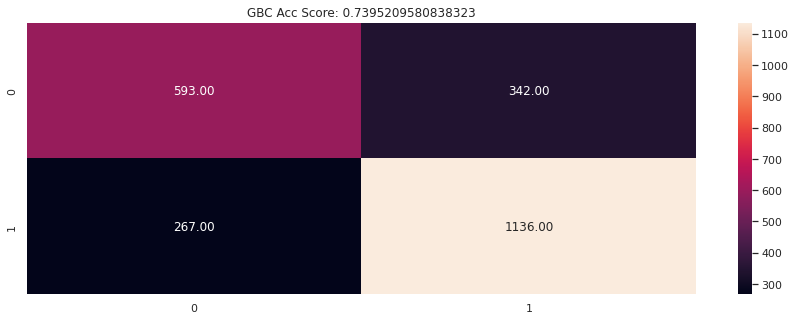

In [98]:
from sklearn.metrics import r2_score
clf = GradientBoostingClassifier(criterion='friedman_mse',
 learning_rate=0.01,
 loss='deviance',
 max_depth= 8,
 max_features='log2')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred = y_pred.reshape(-1,1)
y_true = clf.predict(X_train).reshape(-1,1)
print("MSE: {}\nMAE: {}\nR2 Score: {}\nF1 Score: {}\nTrain Accuracy Score: {}\nTest Accuracy Score: {}\n".format(mean_squared_error(y_test, y_pred),
                                                                                                                 mean_absolute_error(y_test, y_pred),
                                                                                                                 r2_score(y_test,y_pred),
                                                                                                                 f1_score(y_test, y_pred),
                                                                                                                 accuracy_score(y_train, y_true),
                                                                                                                 accuracy_score(y_test, y_pred)
                                                                                                                 ))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".2f")
plt.title("GBC Acc Score: %s"%accuracy_score(y_test,y_pred))
plt.show()

In [100]:
dfCopy.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,anomaly,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Transported_True
0,39.0,0.0,0.0,0.0,0.0,0.000000,1,0,1,0,0,0,0,1,0,0
1,24.0,109.0,9.0,25.0,549.0,44.000000,1,1,0,0,0,0,0,1,0,1
5,44.0,0.0,483.0,0.0,291.0,0.000000,1,1,0,0,0,0,1,0,0,1
7,28.0,0.0,0.0,0.0,0.0,306.789482,1,1,0,0,1,0,0,1,0,1
8,35.0,0.0,785.0,17.0,216.0,0.000000,1,1,0,0,0,0,0,1,0,1


In [127]:
X_train, X_test, y_train, y_test = trainTest(dfCopy, "Transported_True")

In [128]:
X_train.shape

(5453, 15)

In [145]:
dfCopy.Transported_True.value_counts()

1    4599
0    3192
Name: Transported_True, dtype: int64

# **Deep Learning**

In [176]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Input, Activation, Dropout
from keras.callbacks import EarlyStopping
import tensorflow as tf

model = Sequential()
model.add(Dense(256, input_dim = 15))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(16))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(8))
model.add(Activation("softmax"))
model.compile(optimizer = tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"),
    loss="sparse_categorical_crossentropy", metrics = ["accuracy"])
early_stopping_monitor = EarlyStopping(patience = 10)
history = model.fit(X_train, y_train,
                    epochs = 50,
                    batch_size = 32,
                    validation_split = 0.2, 
                    callbacks = [early_stopping_monitor])

Epoch 1/50
137/137 [==============================] - 2s 6ms/step - loss: 9.2293 - accuracy: 0.3920 - val_loss: 1.0716 - val_accuracy: 0.4711
Epoch 2/50
137/137 [==============================] - 1s 4ms/step - loss: 2.4510 - accuracy: 0.4856 - val_loss: 0.7497 - val_accuracy: 0.5866
Epoch 3/50
137/137 [==============================] - 1s 4ms/step - loss: 1.1933 - accuracy: 0.5642 - val_loss: 0.6797 - val_accuracy: 0.5848
Epoch 4/50
137/137 [==============================] - 1s 4ms/step - loss: 0.8402 - accuracy: 0.5908 - val_loss: 0.6759 - val_accuracy: 0.5848
Epoch 5/50
137/137 [==============================] - 1s 4ms/step - loss: 0.7470 - accuracy: 0.6059 - val_loss: 0.6759 - val_accuracy: 0.5848
Epoch 6/50
137/137 [==============================] - 1s 4ms/step - loss: 0.7118 - accuracy: 0.6082 - val_loss: 0.6625 - val_accuracy: 0.5985
Epoch 7/50
137/137 [==============================] - 1s 4ms/step - loss: 0.6996 - accuracy: 0.6135 - val_loss: 0.6627 - val_accuracy: 0.5976
Epoch 

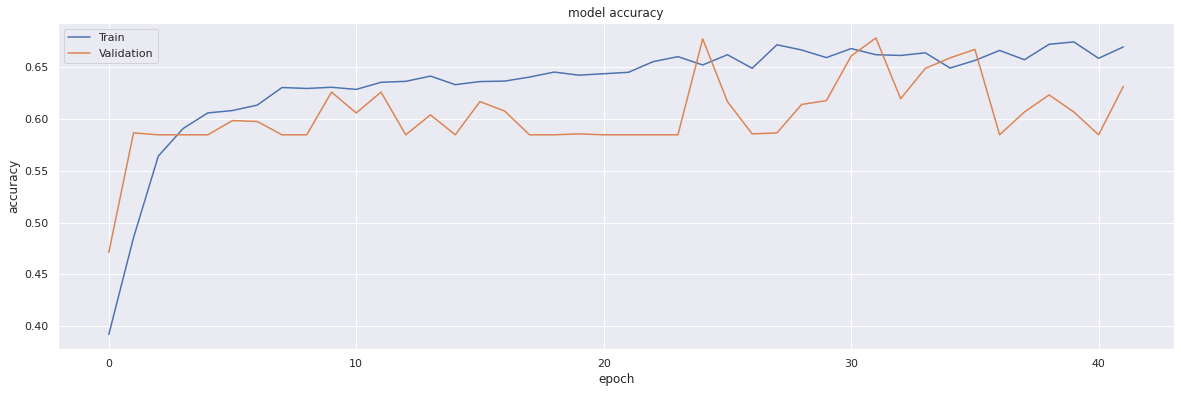

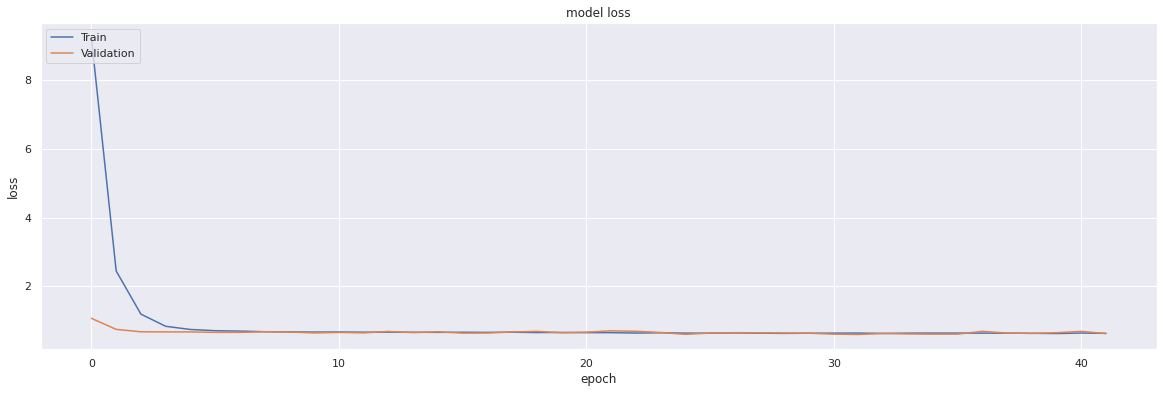

In [177]:
# summarize history for accuracy
plt.figure(figsize=(20,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(20,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [181]:
## Multi Layered ANN (Deep & Optimal Network )
def optimalModel(layers, activation, dropout, init_mode, optimizers):
    model = Sequential()
    for i, neurons in enumerate(layers):
        if i==0: #Input layer
            model.add(Dense(neurons,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(dropout)) #Regularization method to avoid overfitting
        else:
            model.add(Dense(neurons,kernel_initializer=init_mode)) #Hidden Layers
            model.add(Activation(activation))
            model.add(Dropout(dropout))
            
    model.add(Dense(1)) #Output Layer
    model.add(Activation('sigmoid')) 
    
    model.compile(optimizer=optimizers, loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [182]:
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = optimalModel, verbose=0)

In [183]:
#Hyper Parameter Space
activations = ['sigmoid', 'relu', 'softmax']
optimizers = ['adam','rmsprop','sgd']
dropouts = [0.1,0.2,0.3,0.4,0.5]
init_mode = ['lecun_uniform', 'he_normal', 'he_uniform']
momentum = [0.7,0.8,0.9]
layers = [[100], [100, 150], [100, 150, 170], [100,150,170,200], [100,120,150,170,200],[100,120,150,170,200,250]] #Layers Parameter List of List for finding optimal number of layers.
param_grid = dict(layers = layers, activation=activations, batch_size = [128, 256], epochs=[10,20,30,50], dropout = dropouts, init_mode = init_mode, optimizers = optimizers)

In [192]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV
clf = RandomizedSearchCV(estimator=model, param_distributions=param_grid,cv = 10) 

In [193]:
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f85561201d0>,
                   param_distributions={'activation': ['sigmoid', 'relu',
                                                       'softmax'],
                                        'batch_size': [128, 256],
                                        'dropout': [0.1, 0.2, 0.3, 0.4, 0.5],
                                        'epochs': [10, 20, 30, 50],
                                        'init_mode': ['lecun_uniform',
                                                      'he_normal',
                                                      'he_uniform'],
                                        'layers': [[100], [100, 150],
                                                   [100, 150, 170],
                                                   [100, 150, 170, 200],
                                                   [100, 120, 150, 170, 200],
                        

In [187]:
clf.best_score_, clf.best_params_

(0.7030989050865173,
 {'optimizers': 'adam',
  'layers': [100, 150],
  'init_mode': 'he_normal',
  'epochs': 50,
  'dropout': 0.2,
  'batch_size': 256,
  'activation': 'sigmoid'})

In [188]:
y_pred = clf.predict(X_test)

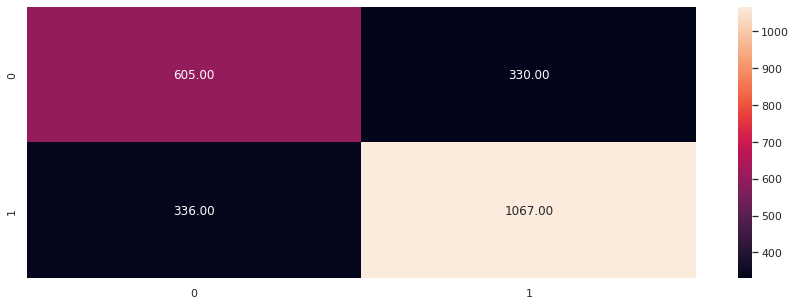

In [189]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".2f")

In [190]:
accuracy_score(y_test, y_pred)

0.7151411462788708

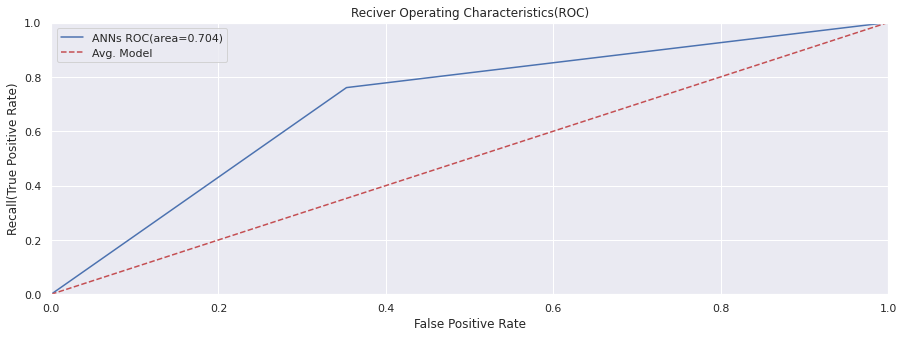

AUC: 0.7


In [191]:
from sklearn.metrics import auc
#ROC_AUC Curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_test, y_pred)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ANNs ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--', label = 'Avg. Model')
plt.legend()
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('\nAUC:',round(roc_auc,2))